In [ ]:
"""
클러스터링은 거리행렬이 있어야 모델을 정의할 수 있다.
target값 없이 군집을 분류하기 때문에 비감독 학습이다.
거리를 구하는 방법은 유클리드 거리, 맨하튼 거리, 민콥스키 거리 등이 있다.
Clustering Analysis 종류 - Dendrogram, K-means, DBSCAN 이 있다.
[계층형] Dendrogram - 거리행렬을 통해 데이터 포인트를 모두 계산 (가장 가까운 값끼리 서로 연결하며 진행)
[비계층형] K-means - 랜덤으로 군집 중심점을 찍어준 모든 점에 대한 평균 거리를 계산하고 이 값이 거의 변하지 않을 때까지 군집 중심점을 옮겨다니며 군집을 찾는 알고리즘
그래서 K(군집의 갯수)를 사용자가 직접 정해줘야 한다. 이해와 구현이 쉬워 오랫동안 사용되고 있다.
[비계층형] DBSCAn - 밀도가 높은 부분을 군집으로 판단 (직관적임)

모든 데이터들의 거리를 모두 구해서 그 중 가장 작은 거리를 최단연결법, 먼 거리를 최장연결법이라고 한다.
모든 원소거리를 더한 후 각각의 크기의 곱으로 나눈 값(평균 거리)을 구하는 것을 평균연결법이라고 한다.
각각의 군집의 평균벡터를 구하고 평균 벡터 끼리 가중평균을 고려한 중심 값을 구하는 것을 중심연결법이라고 한다.
2개의 군집을 하나로 합쳤을 때 늘어나는 오차제곱합 거리가 가장 작은 쪽을 합치는 방법을 워드연결법이라고 한다.
이러한 방법들로 하나하나 원소들을 군집화 시켜가면서 하나의 군집을 만들어 가는것이다.

Dendrogram의 단점은 많은 메모리를 필요로한다. 그래서 큰 규모의 데이터에서 사용이 힘들다.
K-means는 군집의 평균을 매번 계산해서 평균이 움직이지 않을 때까지 계산하기 때문에 원 형태의 군집에 최적화 되어 있다.
DBSCAN은 길쭉한 형태의 군집도 잘 잡아내고 노이즈를 자동으로 잡아낼 수 있는 장점이 있다.
"""

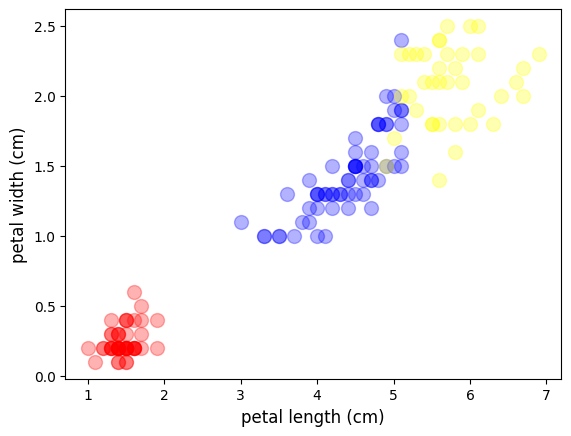

In [10]:
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import datasets
# ipython에서 지원해 주는, notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드
%matplotlib inline

# iris 데이터를 로드
iris = datasets.load_iris()
data = iris['data'] # iris 데이터에서 x_data를 추출

# 학습 → 클러스터 생성
model = cluster.KMeans(n_clusters=3) # K값을 사용자가 임의로 정함 (n_clusters=k)
model.fit(data)

# 학습 결과의 라벨 취득
labels = model.labels_

# 그래프 그리기
ldata = data[labels == 0] # 데이터에서 라벨이 0인 값들만 Idata에 저장
plt.scatter(ldata[:, 2], ldata[:, 3],
                  c='r' ,alpha=0.3,s=100 ,marker="o") # petal(꽃잎) length, width

ldata = data[labels == 1]
plt.scatter(ldata[:, 2], ldata[:, 3],
                  c='b' ,alpha=0.3,s=100 ,marker="o")

ldata = data[labels == 2]
plt.scatter(ldata[:, 2], ldata[:, 3],
                  c='yellow' ,alpha=0.3,s=100 ,marker="o")

# 축 라벨의 설정
plt.xlabel(iris["feature_names"][2],fontsize='large')
plt.ylabel(iris["feature_names"][3],fontsize='large')

plt.show()


In [6]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [11]:
data , data.shape , type(data) 

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [7]:
iris['target'] == model.labels_ # 군집이 잘 나눠졌더라도 실제 Target값과 관련이 없음을 유의해라.

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False, False,

In [9]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])